In [1]:
import warnings
import calendar

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from business_models import greenplum
from business_models.greenplum import GreenplumManager
from business_models import hahn

In [131]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 50)

In [110]:
df = pd.read_csv('mph_monthly.csv')

st_coeff = pd.read_csv('service_type_coeff.csv')

In [117]:
df.mph = [i.replace(',','.') for i in df.mph]
df.mph = df.mph.astype(float)

st_coeff.coeff = [i.replace(',','.') for i in st_coeff.coeff]
st_coeff.coeff = st_coeff.coeff.astype(float)

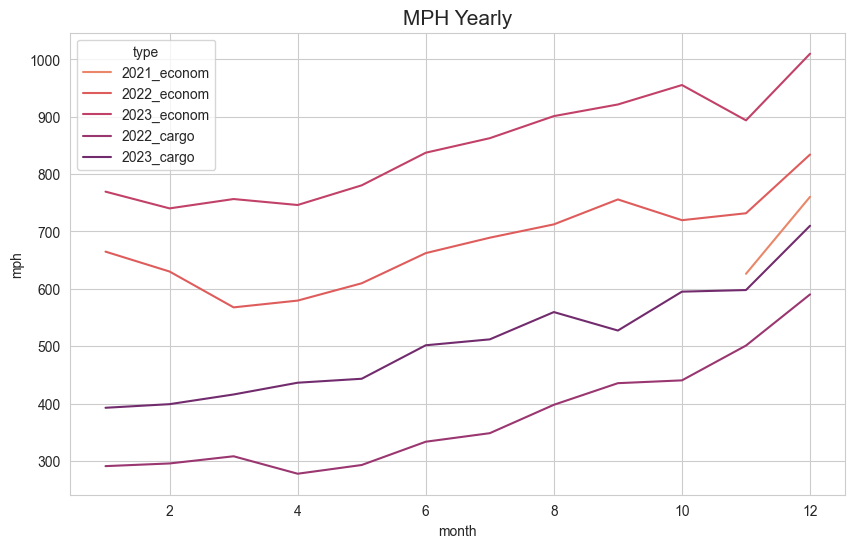

In [53]:
sns.set_style("whitegrid")

ax = sns.lineplot(data=df, x="month", y="mph", hue="type", palette='flare')
ax.figure.set_size_inches(10, 6)

ax.set_title('MPH Yearly', fontsize=15)
ax.figure.set_size_inches(10, 6)

plt.show()

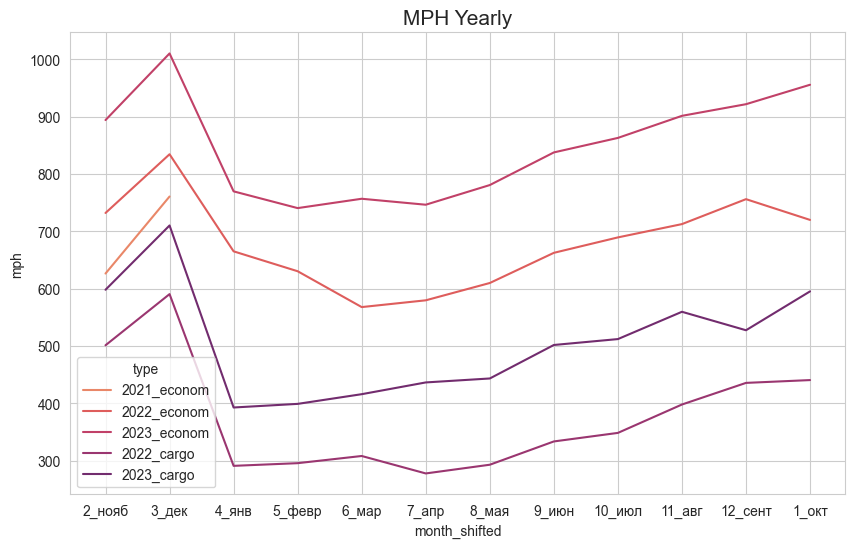

In [54]:
sns.set_style("whitegrid")

ax = sns.lineplot(data=df, x="month_shifted", y="mph", hue="type", palette='flare')
ax.figure.set_size_inches(10, 6)

ax.set_title('MPH Yearly', fontsize=15)
ax.figure.set_size_inches(10, 6)

plt.show()

In [57]:
df['prev_mph'] = df['mph'].shift(1)

In [58]:
df

,dt,month,y,type,month_shifted,mph,prev_mph
0,01.11.2021,11,2021,2021_econom,2_нояб,626.200000,NaN
1,01.12.2021,12,2021,2021_econom,3_дек,760.500000,626.200000
2,01.01.2022,1,2022,2022_econom,4_янв,664.900000,760.500000
3,01.02.2022,2,2022,2022_econom,5_февр,630.200000,664.900000
4,01.03.2022,3,2022,2022_econom,6_мар,567.700000,630.200000
5,01.04.2022,4,2022,2022_econom,7_апр,579.500000,567.700000
6,01.05.2022,5,2022,2022_econom,8_мая,609.700000,579.500000
7,01.06.2022,6,2022,2022_econom,9_июн,662.300000,609.700000
8,01.07.2022,7,2022,2022_econom,10_июл,689.200000,662.300000
9,01.08.2022,8,2022,2022_econom,11_авг,712.400000,689.200000


In [64]:
data = df[df['type']=='2023_econom'][['dt', 'type', 'mph', 'prev_mph']]

In [66]:
data['mom_delta'] = (data['mph'] - data['prev_mph']) / data['prev_mph']

In [67]:
data

,dt,type,mph,prev_mph,mom_delta
14,01.01.2023,2023_econom,769.5,834.2,-0.077559
15,01.02.2023,2023_econom,740.3,769.5,-0.037947
16,01.03.2023,2023_econom,756.6,740.3,0.022018
17,01.04.2023,2023_econom,746.2,756.6,-0.013746
18,01.05.2023,2023_econom,780.5,746.2,0.045966
19,01.06.2023,2023_econom,837.4,780.5,0.072902
20,01.07.2023,2023_econom,862.7,837.4,0.030213
21,01.08.2023,2023_econom,901.2,862.7,0.044627
22,01.09.2023,2023_econom,921.5,901.2,0.022526
23,01.10.2023,2023_econom,955.4,921.5,0.036788


In [102]:
dec_mph = data[data.dt=='01.12.2023']['mph'].squeeze()

dec_mph

1010.0

In [127]:
final_data = pd.DataFrame(columns = ['month', 'basic_mph', 'service_type', 'coeff_to_basic', 'mph'])
last_mph = dec_mph

for r in data.itertuples():
    last_mph = last_mph * (1 + r.mom_delta)

    for st in st_coeff.itertuples():
        final_data = final_data.append({
            'month' : r.dt[:6], 'basic_mph' : int(last_mph), 'service_type' : st.service_type,
            'coeff_to_basic' : round(st.coeff, 3), 'mph' : int(last_mph*st.coeff)
            
        },
            ignore_index=True)

/var/folders/pd/6gyyhtl13jz1jm8hyvvmc0mcsmszvt/T/ipykernel_69438/2718364218.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append({
/var/folders/pd/6gyyhtl13jz1jm8hyvvmc0mcsmszvt/T/ipykernel_69438/2718364218.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append({
/var/folders/pd/6gyyhtl13jz1jm8hyvvmc0mcsmszvt/T/ipykernel_69438/2718364218.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append({
/var/folders/pd/6gyyhtl13jz1jm8hyvvmc0mcsmszvt/T/ipykernel_69438/2718364218.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append({


In [132]:
final_data

,month,basic_mph,service_type,coeff_to_basic,mph
0,01.01.,931,"0,7t",1.000,931
1,01.01.,931,1t,1.140,1062
2,01.01.,931,"1,5t",1.285,1197
3,01.01.,931,3t,1.601,1491
4,01.01.,931,5t,1.818,1694
5,01.01.,931,10t,2.140,1994
6,01.01.,931,"0,7t_loader",1.280,1192
7,01.01.,931,1t_loader,1.453,1353
8,01.01.,931,"1,5t_loader",1.627,1515
9,01.01.,931,3t_loader,2.025,1886


In [133]:
final_data.to_excel('planned_tariff_calc.xlsx', sheet_name='voronezh_suggest_vs_act', index = False)